In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from itertools import product

import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cmocean

import cartopy
import cartopy.crs as ccrs

import xpersist as xp
cache_dir = '/glade/p/cgd/oce/projects/cesm2-marbl/xpersist_cache/3d_fields'
if (os.path.isdir(cache_dir)):
    xp.settings['cache_dir'] = cache_dir
os.makedirs(cache_dir, exist_ok=True)

os.environ['CESMDATAROOT'] = '/glade/scratch/mclong/inputdata'
import pop_tools

import utils
import data_collections
import plot


In [3]:
cluster, client = utils.get_ClusterClient()
cluster.scale(24) #adapt(minimum_jobs=0, maximum_jobs=24)
client

Client Scheduler: tcp://10.12.206.15:43140 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mclong/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
experiments = [
    'historical',
    'SSP1-2.6',
    'SSP2-4.5',
    'SSP3-7.0',
    'SSP5-8.5',
]

In [5]:
query = dict(
    experiment=experiments,
    stream='pop.h',
)
glb_int = data_collections.global_integral_timeseries_ann(query)
glb_avg = data_collections.global_mean_timeseries_ann(query)
glb_int

{ 'esm_collection': 'data/campaign-cesm2-cmip6-timeseries.json',
  'name': 'global_integral_timeseries_ann',
  'operator_kwargs': [ { },
                       { 'include_ms': False,
                         'normalize': False},
                       { }],
  'operators': [ 'center_time',
                 'global_mean',
                 'resample_ann'],
  'preprocess': None}

In [6]:
dsets_int = glb_int.to_dataset_dict('FG_CO2', clobber=False)
dsets_avg = glb_avg.to_dataset_dict(['ATM_CO2', 'SST',], prefer_derived=True, clobber=False)

assert dsets_int.keys() == dsets_avg.keys()

dsets = {}
for key in dsets_int.keys():
    dsets[key] = xr.merge((dsets_int[key].compute(), dsets_avg[key].compute()))

dsets


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'


{'ocn.SSP1-2.6.pop.h': <xarray.Dataset>
 Dimensions:                 (lat_aux_grid: 395, member_id: 3, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 86, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
 Coordinates:
   * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
   * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
   * member_id               (member_id) int64 4 10 11
   * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
   * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
   * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
   * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
   * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
   * time                    (time) int64 2015 2016 2017 2018 ... 2098 2099 2100
 Dimensions without coordinates: moc_

In [7]:
del client
del cluster

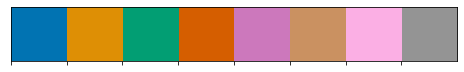

In [8]:
import seaborn as sns

current_palette = sns.color_palette('colorblind', 8)
sns.palplot(current_palette)

exp_colors = {
    'PI': current_palette.as_hex()[-1],
    'historical': 'k',
    'SSP1-2.6': current_palette.as_hex()[0],
    'SSP2-4.5': current_palette.as_hex()[1],
    'SSP3-7.0': current_palette.as_hex()[2],
    'SSP5-8.5': current_palette.as_hex()[3],
}

In [9]:
variable_labels = dict(
    year='Year',
    FG_CO2='Air-sea CO$_2$ flux [Pg C yr$^{-1}$]',
    photoC_TOT_zint_100m='NPP (z > -100m) [Pg C yr$^{-1}$]',
    photoC_TOT_zint='NPP [Pg C yr$^{-1}$]',
    POC_FLUX_100m='POC flux (100 m) [Pg C yr$^{-1}$]',
    ATM_CO2='Atmospheric CO$_2$ [ppm]',
    SST='Temperature [°C]',
    time='',
)

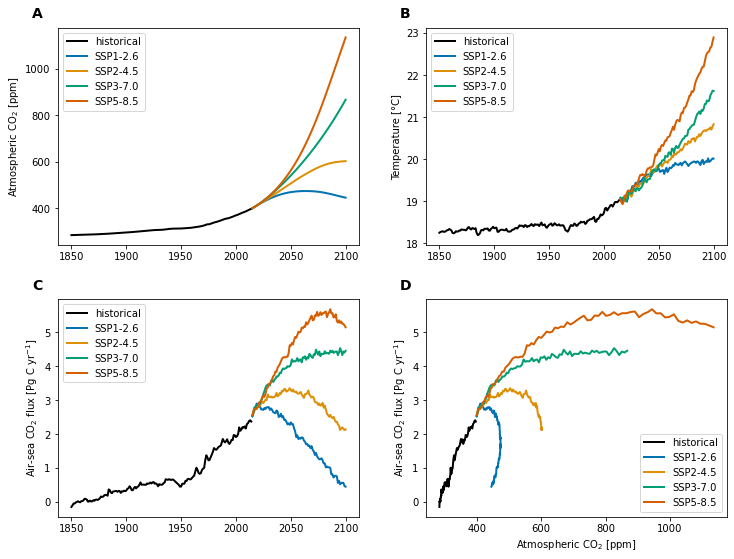

In [10]:
y = 'FG_CO2'
x = 'SST'

nrow = 2
ncol = 2
#fig, axs = plt.subplots(nrow, ncol, figsize=(4*ncol, 3*nrow), constrained_layout=False)

fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(
    nrows=2, ncols=2, 
    hspace=0.25,
    wspace=0.22,
)
axs = np.empty((2, 2)).astype(object)
for i, j in product(range(2), range(2)):
    axs[i, j] = plt.subplot(gs[i, j])



X = [['time', 'time'], ['time', 'ATM_CO2'],]
Y = [['ATM_CO2', 'SST'], ['FG_CO2', 'FG_CO2'],]

for i, j in product(range(2), range(2)):
    ax = axs[i, j]
    x = X[i][j]
    y = Y[i][j]
    for exp in experiments:
        ds = dsets[f'ocn.{exp}.pop.h']
        #for member_id in ds.member_id.values:
        #    ax.plot(ds.time, ds[v].sel(member_id=member_id), '-', alpha=0.25, linewidth=1, color=exp_colors[exp])
        ax.plot(ds.mean('member_id')[x], ds.mean('member_id')[y], '-', linewidth=2, color=exp_colors[exp], label=exp)
        
    ax.set_ylabel(variable_labels[y])    
    ax.legend()
    ax.set_xlabel(variable_labels[x])
utils.label_plots(fig, [ax for ax in axs.ravel()], xoff=-0.03, yoff=0.015)   

utils.savefig(f'global-timeseries-FG_CO2')

In [11]:
baseline = dsets['ocn.historical.pop.h'].SST.isel(time=slice(0, 10)).mean()
for exp, ds in dsets.items():
    if 'SSP' in exp:
        warming = ds.SST.isel(time=-1).mean() - baseline
        print(f'{exp}: {warming.values:0.2f}')


ocn.SSP1-2.6.pop.h: 1.72
ocn.SSP2-4.5.pop.h: 2.54
ocn.SSP3-7.0.pop.h: 3.33
ocn.SSP5-8.5.pop.h: 4.60
